# Correlations between Drug Classes

This notebook computes two types of correlation between our 75 drug classes:
- Volume correlation (TRx feature in our data)
- Price change correlation (using precomputed percent change in price for a month to another)

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import time
import datetime

# Importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
plt.style.use('fivethirtyeight')
from tqdm import tqdm

In [2]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2014_V3.csv')

# We only consider data pre_covid (pre 2020) for correlations
df = df[df.Year != 2020]

# Correcting nan values for Volume
df['TRx'] = df['TRx'].fillna(0)

df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change,Changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,10,2014,0.0,2014_10,NaN,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,11,2014,6.0,2014_11,0.00000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,12,2014,22.0,2014_12,0.00000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,0.00000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,2,2015,15.0,2015_02,0.00000,0
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,3,2015,33.0,2015_03,0.00000,0
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,4,2015,47.0,2015_04,0.00000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,5,2015,36.0,2015_05,0.08904,1
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,6,2015,54.0,2015_06,0.00000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,7,2015,55.0,2015_07,0.00000,0


## Volume (TRx) Correlation

In [3]:
# Creating a table containing total Volume (sum) per month for each drug class called trx
# We have NaN Values cause for some classes there are not info for certain dates
trx = df.groupby(['Major Class', 'Date']).TRx.sum().unstack().transpose().copy()
trx.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,2590.0,NaN,1419308.0,559.0,77731.0,34008.0,80851.0,927023.0,4740.0,78288.0,...,5803135.0,705004.0,NaN,5788.0,155.0,1871470.0,543747.0,273977.0,61659.0,1052.0
2014_09,2865.0,NaN,1479415.0,617.0,75847.0,34105.0,84698.0,947541.0,4665.0,80983.0,...,6194971.0,706012.0,NaN,6000.0,124.0,1889276.0,545202.0,437213.0,48981.0,1158.0
2014_10,2656.0,NaN,1569909.0,594.0,84794.0,35069.0,82018.0,948974.0,4580.0,84325.0,...,6426457.0,726187.0,NaN,6244.0,131.0,1938759.0,564256.0,776294.0,43253.0,1160.0
2014_11,2503.0,NaN,1411803.0,619.0,87516.0,32128.0,44888.0,858943.0,4170.0,76945.0,...,5941924.0,657099.0,NaN,5404.0,137.0,1788978.0,516835.0,515860.0,41046.0,1004.0
2014_12,3078.0,NaN,1508548.0,1389.0,101306.0,35810.0,47736.0,921016.0,4430.0,175874.0,...,6810177.0,744866.0,NaN,6498.0,175.0,3898129.0,570719.0,431897.0,53042.0,1221.0


In [4]:
# Computing correlation matrix between the different classes based on volume
# Pandas will ignore NaN
trx_corr = trx.corr()
trx_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,0.312560,0.712669,-0.543437,0.798129,0.872431,0.515545,0.573750,0.518358,-0.056006,...,0.427644,0.645360,-0.085946,0.273869,-0.493639,0.550124,0.653257,-0.135247,0.134179,0.613909
A05A1 CHOLERETICS+CHOLEKINETIC,0.312560,1.000000,0.375087,-0.194517,0.407505,0.336902,0.252679,0.135506,0.298249,-0.140959,...,0.283253,0.355495,0.131627,0.306157,-0.337069,0.372724,0.386495,-0.058919,0.046534,0.343713
ADHD,0.712669,0.375087,1.000000,-0.745042,0.796630,0.682521,0.704636,0.773620,0.835875,-0.267270,...,0.396289,0.883108,-0.005763,0.262372,-0.853993,0.586462,0.724314,-0.178183,0.419629,0.859760
ALL OTHER RESPIRATORY,-0.543437,-0.194517,-0.745042,1.000000,-0.556030,-0.502666,-0.916004,-0.949907,-0.885004,0.345125,...,-0.134360,-0.875646,0.287951,-0.036380,0.852094,-0.640746,-0.618137,0.361011,-0.417869,-0.927942
ALL OTHER THERAPEUTICS,0.798129,0.407505,0.796630,-0.556030,1.000000,0.756611,0.411143,0.614619,0.616181,-0.262051,...,0.360975,0.705654,-0.243240,0.276592,-0.683743,0.471263,0.582642,-0.232174,0.150718,0.675075


In [5]:
# Formating the correlation matrix to make it easier for Tableau analysis
trx_corr_format = trx_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
trx_corr_format

# Saving csv file
trx_corr_format.to_csv('trx_corr_since2014_noCovid.csv')

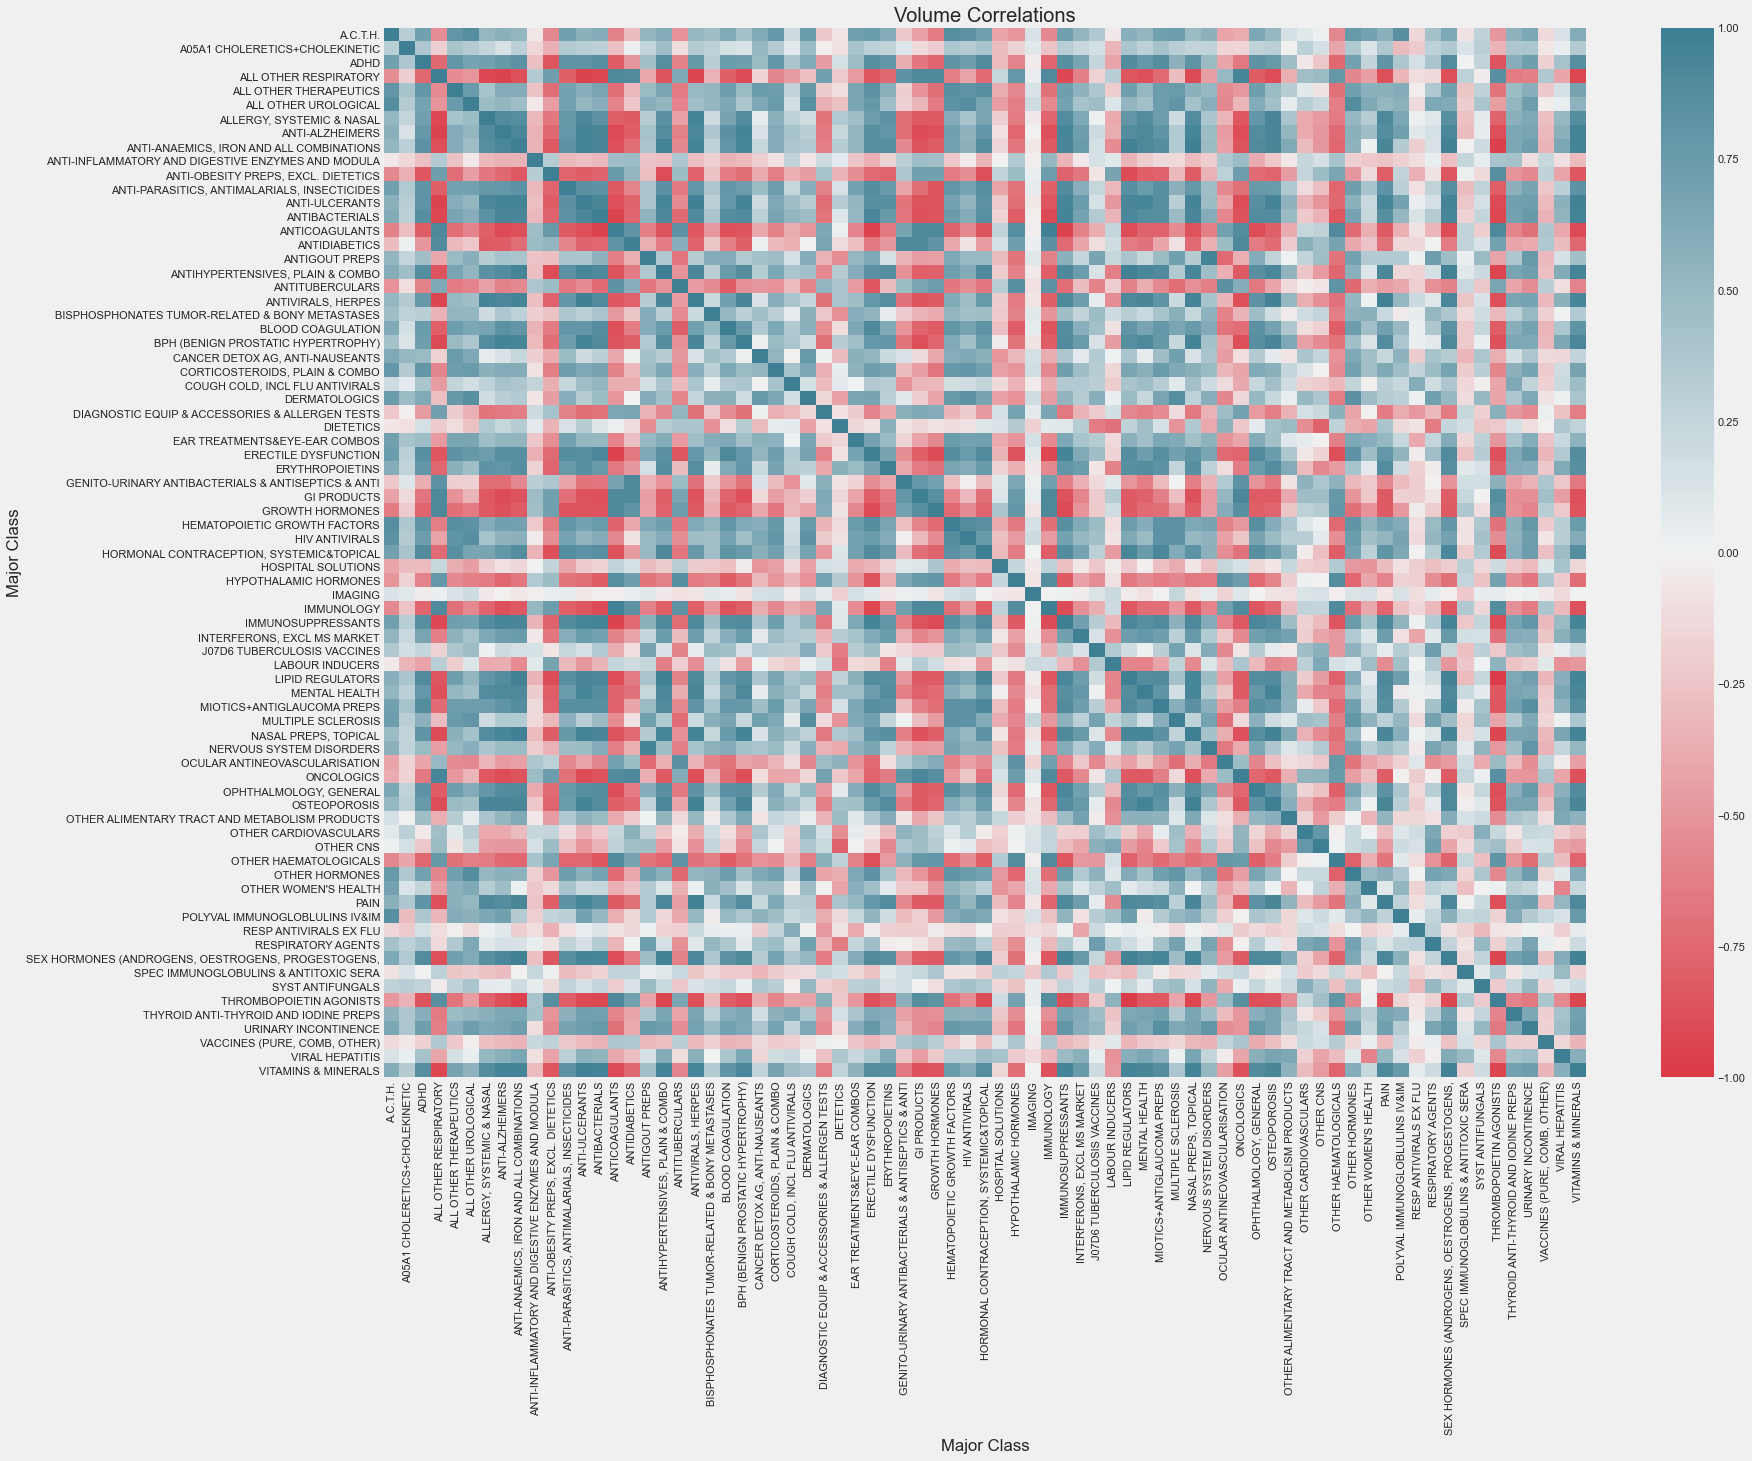

In [6]:
# plotting correlation matrix
plt.subplots(figsize=(24,18))
sns.heatmap(trx_corr, annot=False, cmap=sns.diverging_palette(10, 220, as_cmap=True), vmin = -1, vmax = 1, center = 0)
plt.savefig('TRx_correlations_Major_class_noCovid.jpg', bbox_inches='tight', pad_inches=2)
plt.title('Volume Correlations')
plt.show()

## Price Changes Correlation

In [9]:
# Loading the dataset
df = pd.read_csv('../Processed_Data/drugs_pct_changes_monthly_since2014_V3.csv')

# We only consider data pre_covid (pre 2020) for correlations
df = df[df.Year != 2020]



df.head(10)

,NDC,Product,Major Class,Acute/Chronic,Prod Form,Pack Size,Pack Quantity,WAC,Month,Year,TRx,Date,Pct_change,Changed
0,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,10,2014,NaN,2014_10,NaN,0
1,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,11,2014,6.0,2014_11,0.00000,0
2,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,12,2014,22.0,2014_12,0.00000,0
3,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,1,2015,21.0,2015_01,0.00000,0
4,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,2,2015,15.0,2015_02,0.00000,0
5,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,3,2015,33.0,2015_03,0.00000,0
6,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,244.16,4,2015,47.0,2015_04,0.00000,0
7,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,5,2015,36.0,2015_05,0.08904,1
8,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,6,2015,54.0,2015_06,0.00000,0
9,2143301,TRULICITY 10/2014 LLY,ANTIDIABETICS,CHRONIC,INJECTABLES,1,0.5,265.90,7,2015,55.0,2015_07,0.00000,0


In [10]:
# Creating a table containing total number of price changes (sum) from month to month for each drug class called changed
changed = df.groupby(['Major Class', 'Date']).Changed.sum().unstack().transpose().copy()
changed.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Date,,,,,,,,,,,,,,,,,,,,,
2014_08,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014_09,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,7.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014_10,0.0,NaN,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,3.0,3.0,NaN,0.0,0.0,0.0,0.0,15.0,0.0,0.0
2014_11,0.0,NaN,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,NaN,0.0,0.0,3.0,0.0,3.0,0.0,0.0
2014_12,1.0,NaN,7.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,...,2.0,2.0,NaN,0.0,0.0,29.0,0.0,0.0,4.0,0.0


We have a lot of NaN values cause some classes do not have data in certain years.

In [11]:
# Computing correlation matrix between the different classes based on price change
changed_corr = changed.corr()
changed_corr.head()

Major Class,A.C.T.H.,A05A1 CHOLERETICS+CHOLEKINETIC,ADHD,ALL OTHER RESPIRATORY,ALL OTHER THERAPEUTICS,ALL OTHER UROLOGICAL,"ALLERGY, SYSTEMIC & NASAL",ANTI-ALZHEIMERS,"ANTI-ANAEMICS, IRON AND ALL COMBINATIONS",ANTI-INFLAMMATORY AND DIGESTIVE ENZYMES AND MODULA,...,RESPIRATORY AGENTS,"SEX HORMONES (ANDROGENS, OESTROGENS, PROGESTOGENS,",SPEC IMMUNOGLOBULINS & ANTITOXIC SERA,SYST ANTIFUNGALS,THROMBOPOIETIN AGONISTS,THYROID ANTI-THYROID AND IODINE PREPS,URINARY INCONTINENCE,"VACCINES (PURE, COMB, OTHER)",VIRAL HEPATITIS,VITAMINS & MINERALS
Major Class,,,,,,,,,,,,,,,,,,,,,
A.C.T.H.,1.000000,NaN,0.445375,0.055139,0.243018,0.212122,0.117007,0.381008,0.195146,0.163221,...,0.471124,0.555080,-0.047946,0.367955,0.458536,0.305533,0.381298,0.168209,0.672942,-0.058270
A05A1 CHOLERETICS+CHOLEKINETIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADHD,0.445375,NaN,1.000000,0.124097,0.655333,0.421442,0.555633,0.767348,0.156470,0.111872,...,0.872385,0.794420,0.251153,0.843237,0.661836,0.360748,0.640645,0.141165,0.718713,-0.067964
ALL OTHER RESPIRATORY,0.055139,NaN,0.124097,1.000000,-0.002234,0.257906,0.178091,0.077944,0.147821,0.025444,...,0.201465,0.242318,0.109507,0.124683,0.245289,0.042442,-0.032617,0.179579,0.009398,-0.078396
ALL OTHER THERAPEUTICS,0.243018,NaN,0.655333,-0.002234,1.000000,0.263170,0.513878,0.579231,-0.124816,-0.071804,...,0.620151,0.549075,0.243797,0.671964,0.678741,0.109913,0.657964,0.032005,0.520211,-0.071820


In [12]:
# Formating the correlation matrix to make it easier for Tableau analysis
changed_corr = changed_corr.stack().to_frame().reset_index(level=1).rename(columns={'Major Class': 'column', 0: 'corr'}).reset_index().rename(columns={'Major Class': 'row'})
changed_corr

# Saving csv file
changed_corr.to_csv('price_chg_corr_since2014_noCovid.csv')

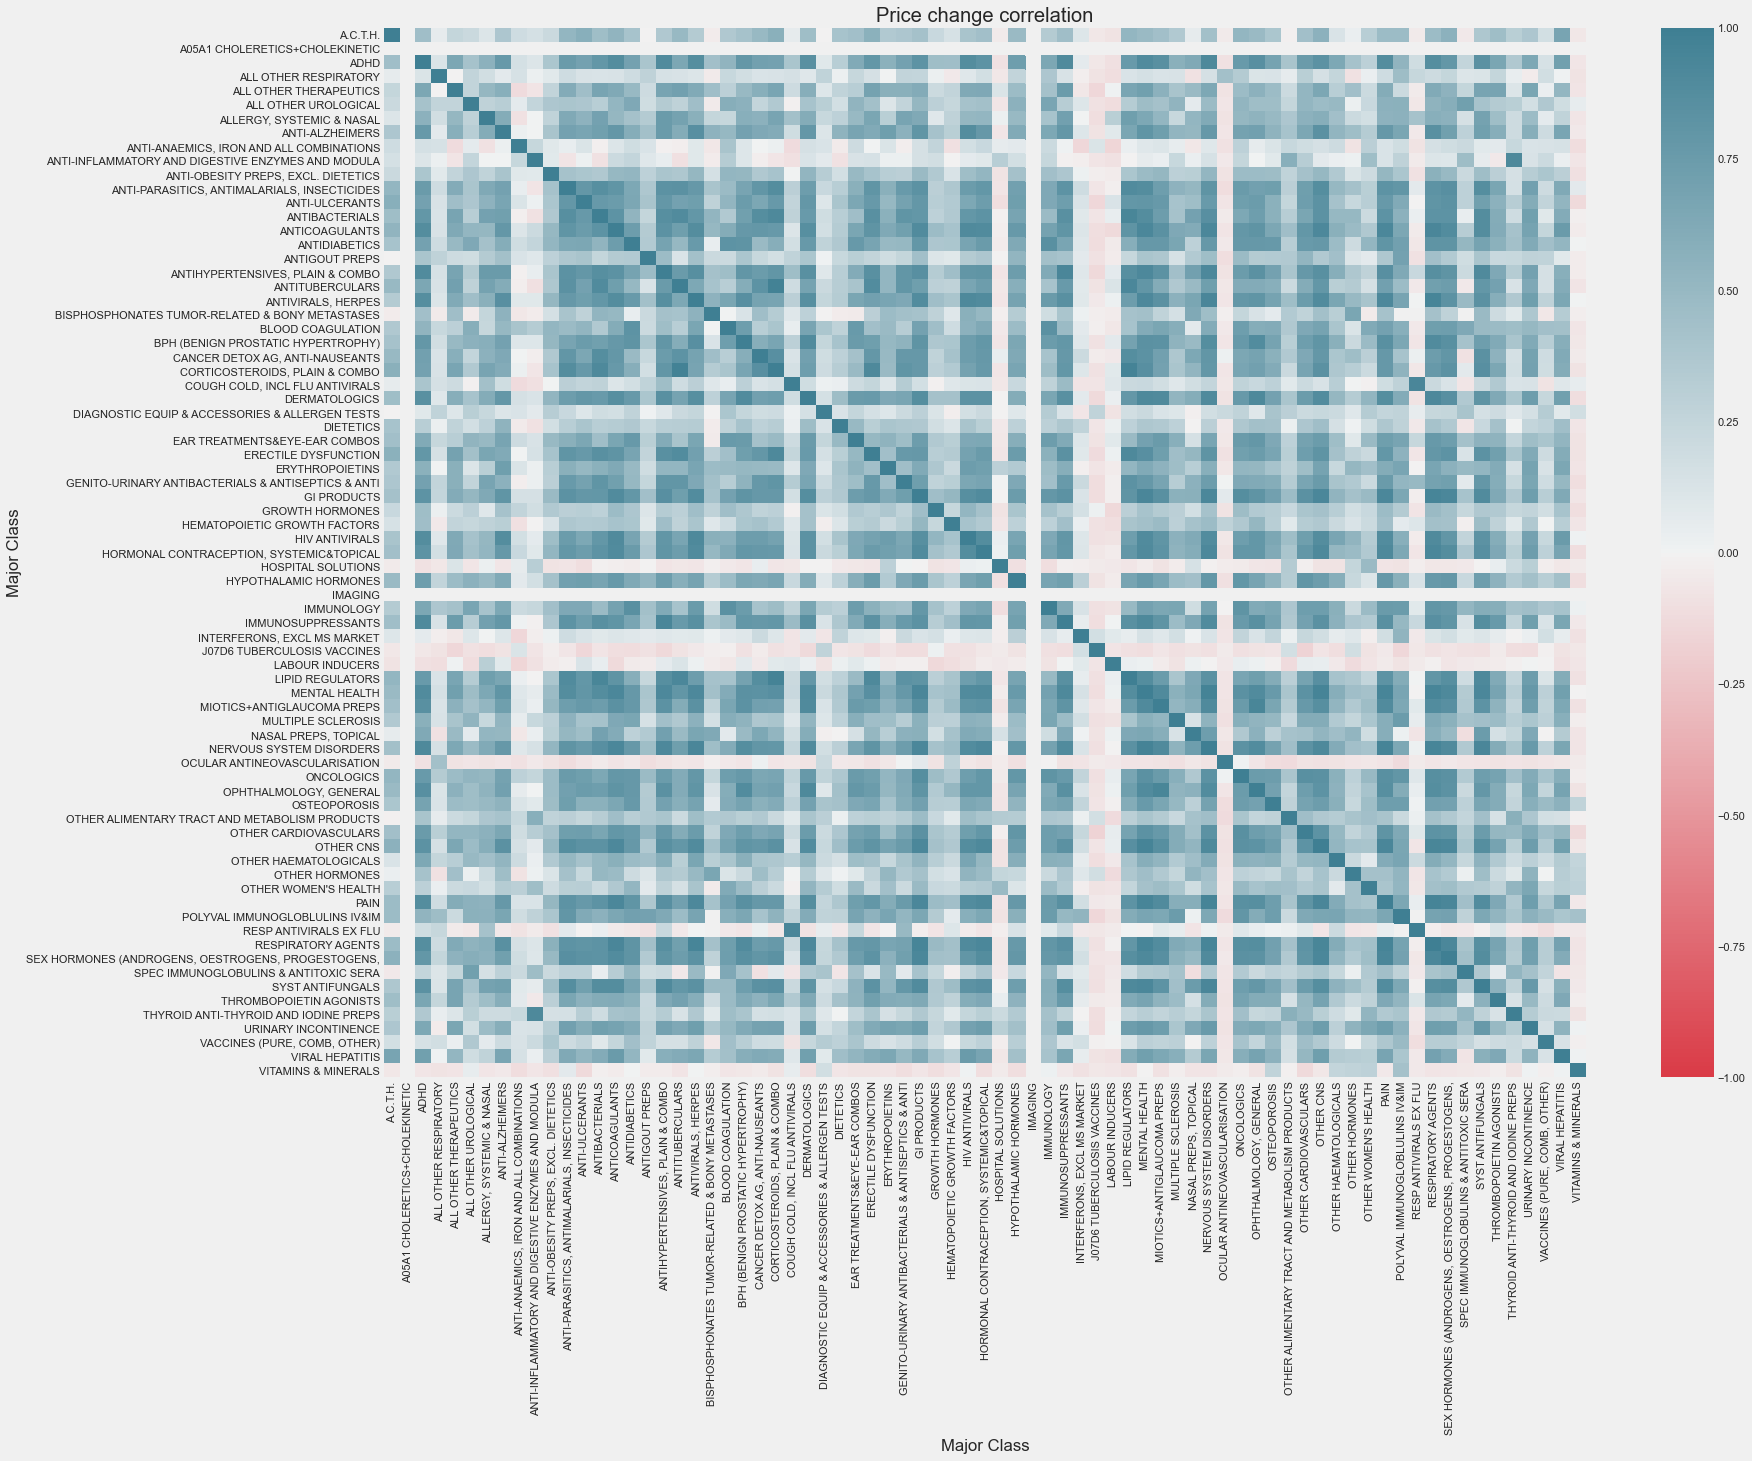

In [13]:
# plotting correlation matrix
plt.subplots(figsize=(24,18))
sns.heatmap(changed.corr(), annot=False, cmap=sns.diverging_palette(10, 220, as_cmap=True), vmin = -1, vmax = 1, center = 0)
plt.savefig('Price_chanced_correlations_Major_class_noCovid.jpg', bbox_inches='tight', pad_inches=2)
plt.title("Price change correlation")
plt.show()